In [21]:
#import libraries
import mca
import prince
import pandas as pd
import numpy as np



import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from sklearn.metrics import confusion_matrix
import itertools

from sklearn.model_selection import GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb

import seaborn as sns
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)

import pickle

from sklearn.decomposition import PCA

In [22]:
X = pd.read_csv('CSV_files/training_set_values.csv', index_col = 0)
y = pd.read_csv('CSV_files/training_set_labels.csv', index_col = 0)

#df = pd.concat([X, y], axis = 1)

In [28]:

def pipeline_d(df):
    
    installer_dummies = pd.get_dummies(df['installer'], prefix='installer')
    installer_dummies = installer_dummies[['installer_DWE' , 'installer_Government']]

    funder_dummies = pd.get_dummies(df['funder'], prefix='funder')
    funder_dummies = funder_dummies[['funder_Hesawa' , 'funder_Danida', 'funder_Government Of Tanzania']]

    subvillage_dummies = pd.get_dummies(df['subvillage'], prefix='subvillage')
    subvillage_dummies = subvillage_dummies[['subvillage_Madukani' , 'subvillage_Shuleni', 'subvillage_Majengo']]

    district_dummies = pd.get_dummies(df['district_code'], prefix='district')
    district_dummies = district_dummies[['district_1' , 'district_2', 'district_3', 'district_4']]

    df['construction_year'] = [0 if x == 0 else 1 if x <= 1990 else 2 for x in df['construction_year']]
    year_dummies = pd.get_dummies(df['construction_year'], prefix='construction_year', drop_first=True)

    lga_dummies = pd.get_dummies(df['lga'], prefix='lga')

    lga_dummies = lga_dummies[['lga_Njombe',          
                                'lga_Arusha Rural',
                                'lga_Moshi Rural',   
                                'lga_Bariadi',         
                                'lga_Rungwe',         
                                'lga_Kilosa',         
                                'lga_Kasulu',          
                                'lga_Mbozi',           
                                'lga_Meru',            
                                'lga_Bagamoyo' ]]

    basin_dummies = pd.get_dummies(df['basin'], prefix = 'basin_', drop_first = True)

    region_dummies = pd.get_dummies(df['region'], prefix = 'region_', drop_first = True)

    extraction_dummies = pd.get_dummies(df['extraction_type_class'], prefix = 'extraction_', 
                                        drop_first = True)

    payment_dummies = pd.get_dummies(df['payment'], prefix = 'payment_', drop_first = True)

    quality_dummies = pd.get_dummies(df['quality_group'], prefix = 'quality_', drop_first = True)

    quantity_dummies = pd.get_dummies(df['quantity'], prefix = 'quantity_', drop_first = True)

    source_type_dummies = pd.get_dummies(df['source_type'], prefix = 'source_type', 
                                         drop_first = True)

    source_class_dummies = pd.get_dummies(df['source_class'], prefix = 'source_class', 
                                          drop_first = True)

    waterpoint_type_dummies = pd.get_dummies(df['waterpoint_type_group'], prefix = 'waterpoint_type_',
                                           drop_first = True)

    permit_dict = {True: 1,
                   False: 0}

    df[['permit', 'public_meeting']] = df[['permit', 'public_meeting']].replace(permit_dict)

    dfd = pd.concat([waterpoint_type_dummies, source_class_dummies, source_type_dummies,
                         basin_dummies, region_dummies, extraction_dummies, payment_dummies,
                         quality_dummies, quantity_dummies, funder_dummies, installer_dummies, 
                         subvillage_dummies, district_dummies,lga_dummies, year_dummies], axis = 1)

    
    return df

In [30]:
dumm = pipeline_d(X)

In [31]:
mca = prince.MCA()

In [32]:
mca = mca.fit(dumm)
mca = mca.transform(dumm)
print(mca)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
ax = mca.plot_coordinates(
     X=X,
     ax=None,
     figsize=(6, 6),
     show_row_points=True,
     row_points_size=10,
     show_row_labels=False,
     show_column_points=True,
     column_points_size=30,
     show_column_labels=False,
     legend_n_cols=1
     )

ax.get_figure().savefig('images/mca_coordinates.svg')

In [4]:
df = df[df['construction_year'] > 0]

In [5]:
features = ['amount_tsh', 'gps_height', 'population', 'construction_year']

In [6]:
X_pca = df[features].values
y_pca = df['status_group'].values

In [7]:
# preprocess the data 
from sklearn.preprocessing import StandardScaler

X_pca = StandardScaler().fit_transform(X_pca)

In [8]:
# create principal components 
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(X_pca)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2',
                                      'principal component 3', 'principal component 4'])

In [9]:
pca.explained_variance_ratio_

array([0.26999786, 0.25443441, 0.24368456, 0.23188318])

In [10]:
pca.explained_variance_

array([1.08001935, 1.01776393, 0.97476343, 0.92755668])

In [11]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_
print(eig_values)
print(eig_vectors)

[1.08001935 1.01776393 0.97476343 0.92755668]
[[-0.32304204 -0.65162255  0.62652073  0.28018505]
 [ 0.65630165  0.22703118  0.27767018  0.66379535]
 [ 0.61239116 -0.25551907  0.34651443 -0.66303456]
 [-0.29981504  0.67716682  0.6405457  -0.2031188 ]]


In [12]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]
pc3 = pca.components_[2]

In [13]:
# get the loadings

structure_loading_1 = pc1 * np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=features)
str_loading_1

amount_tsh          -0.335718
gps_height          -0.677192
population           0.651105
construction_year    0.291179
dtype: float64

In [14]:
structure_loading_2 = pc2* np.sqrt(eig_values[1])
str_loading_2 = pd.Series(structure_loading_2, index=features)
str_loading_2

amount_tsh           0.662105
gps_height           0.229039
population           0.280126
construction_year    0.669665
dtype: float64

In [15]:
structure_loading_3 = pc3* np.sqrt(eig_values[2])
str_loading_3 = pd.Series(structure_loading_3, index=features)
str_loading_3

amount_tsh           0.604614
gps_height          -0.252274
population           0.342114
construction_year   -0.654615
dtype: float64

Text(0, 0.5, 'proportion of explained variance')

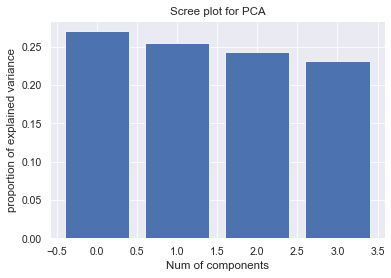

In [33]:
index = np.arange(4)
plt.bar(index, pca.explained_variance_ratio_)
plt.title('Scree plot for PCA')
plt.xlabel('Num of components')
plt.ylabel('proportion of explained variance')

Text(0, 0.5, 'explained variance ratio')

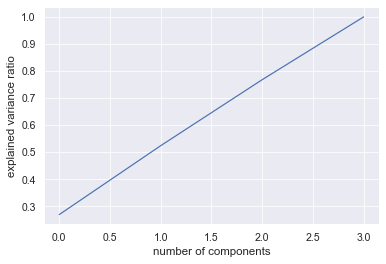

In [34]:
# plotting screeplots 
#print(pca.explained_variance_ratio_)
#print(pca.explained_variance_)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')